# Assignment: Advanced Regression

## Assignment Part-I

### 1. Importing the libraries 

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Reading Data and Data Understanding 

In [2]:
#loading the data into the dataframe
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape of the data
data.shape

(1460, 81)

Analysis - 
- There are 81 columns and 1460 rows in the dataset. 
- The target variable is 'SalePrice'.

In [5]:
#checking the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Analysis - 
- There are some columns like 'Alley', 'FireplaceQu', 'PoolQC', etc. having large number of missing values.

In [6]:
#checking the descriptive statistics of the dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#checking the columns of the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#checking the data types of each column of the dataset
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#### Target Variable
SalePrice is the variable we need to predict.

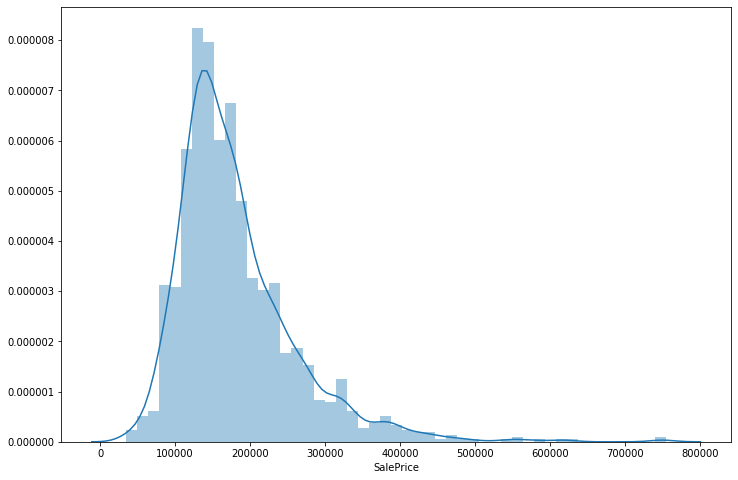

In [9]:
#plotting the SalePrice column of the dataset
plt.figure(figsize = (12,8))
sns.distplot(data['SalePrice'])

Analysis - 
- From the above graph that the target variable i.e. SalePrice is right-skewed.

### 3. Exploratory Data Analysis 

#### Correlation Matrix

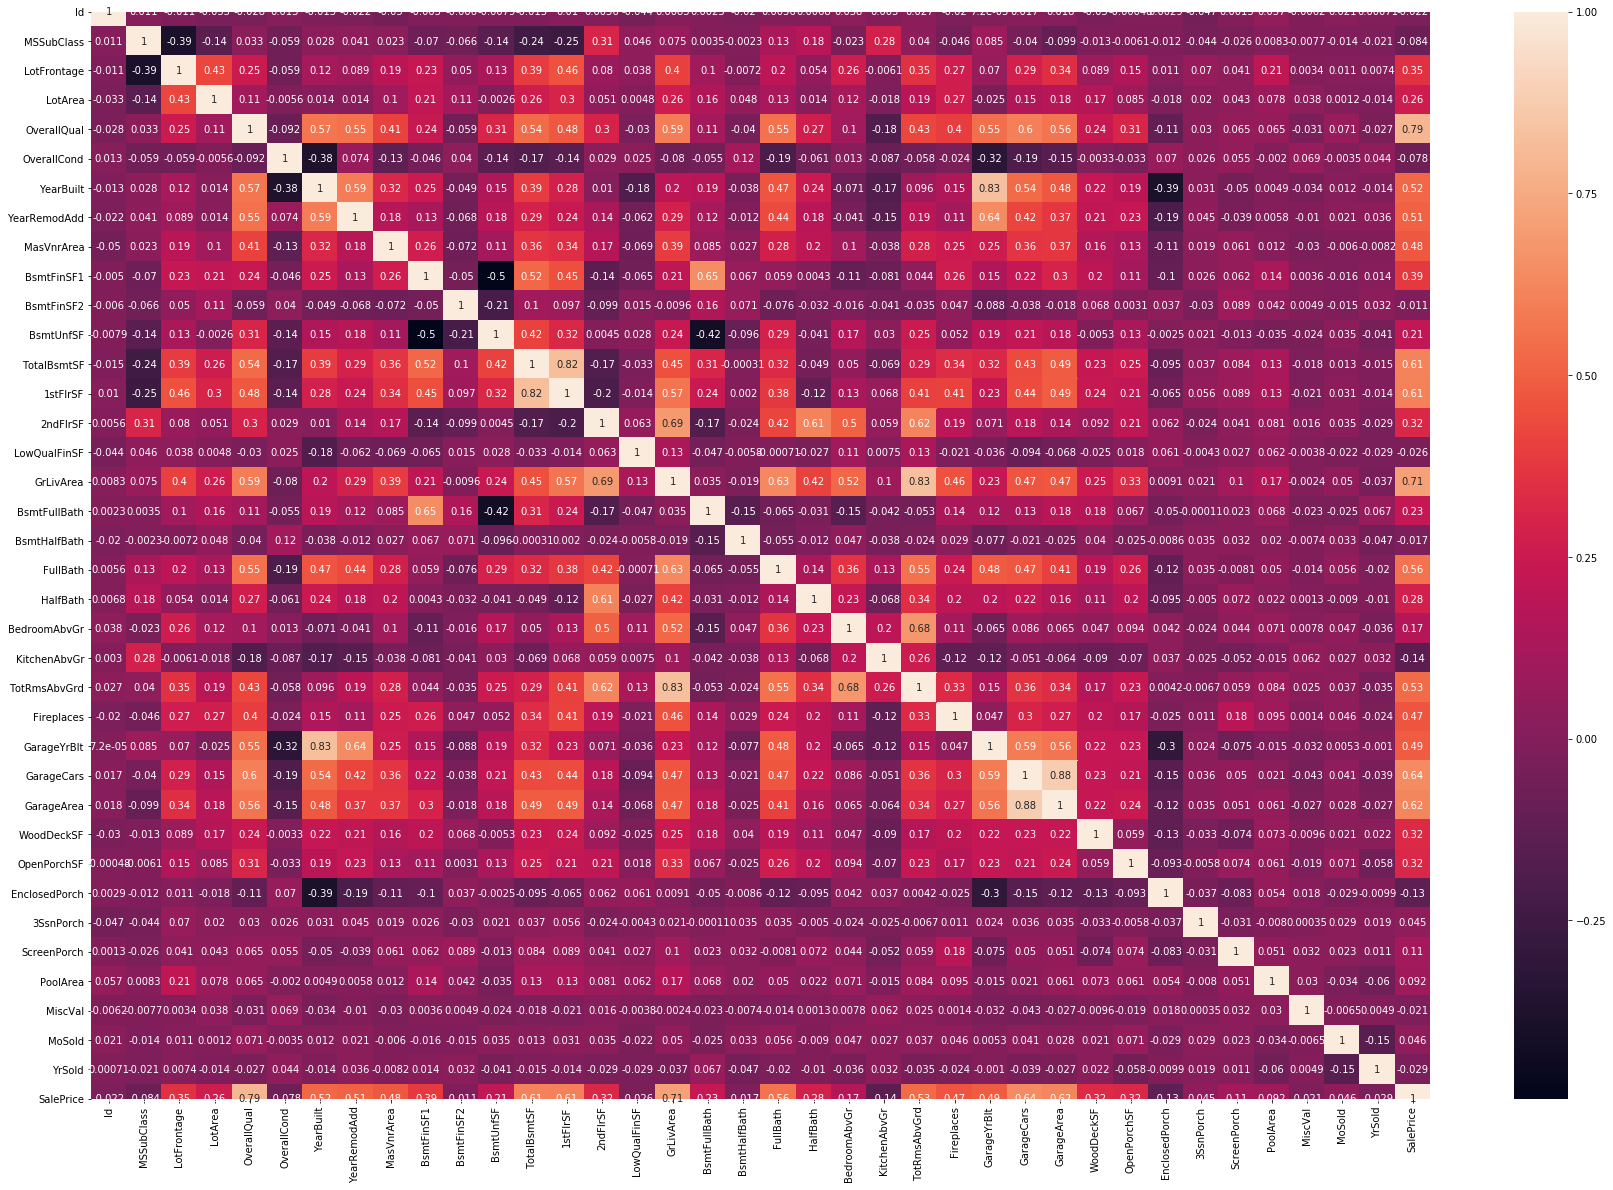

In [10]:
plt.figure(figsize = (30,20))
sns.heatmap(data.corr(), annot = True)

Analysis - 
- By looking at the correlation matrix, we can see that there is a strong correlation among 'SalePrice' (Predictor variable) and 'YearBuilt', 'TotalBsmtSF', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', etc.

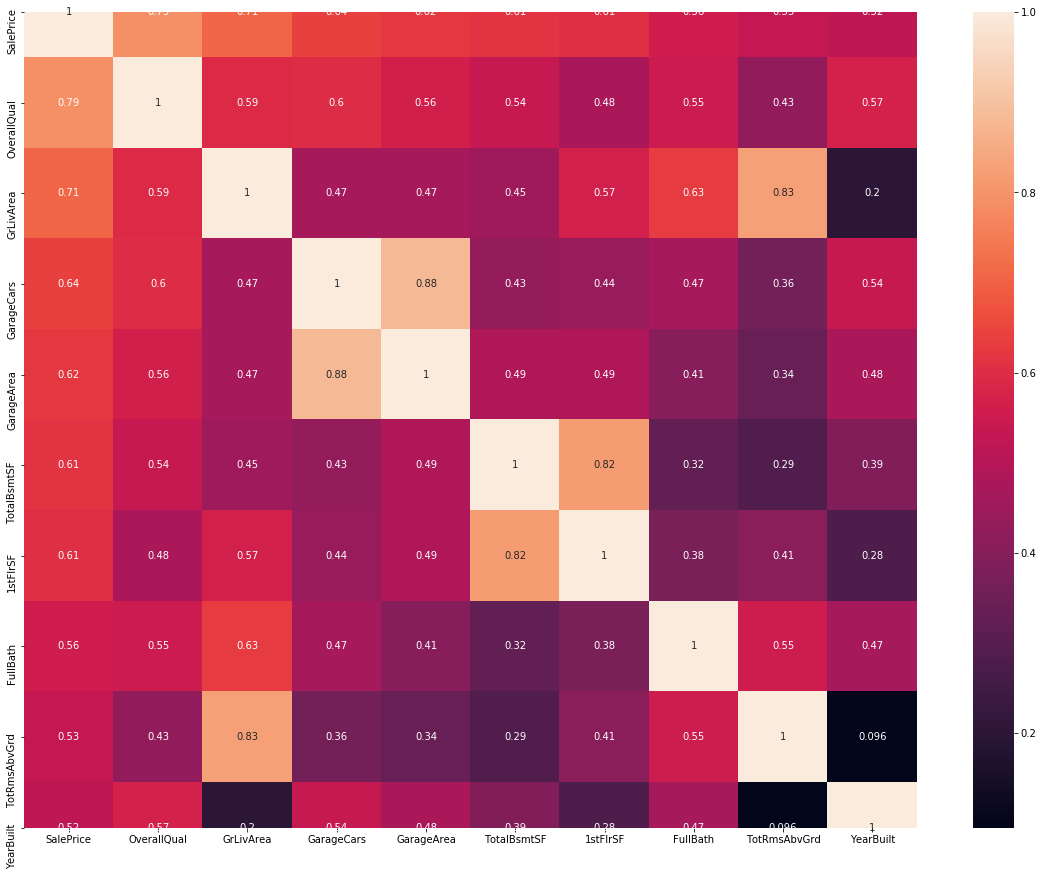

In [11]:
#Correlation Matrix for 'SalePrice' variable
corr = data.corr()
col = corr.nlargest(10, 'SalePrice')['SalePrice'].index
plt.figure(figsize = (20,15))
cormat = np.corrcoef(data[col].values.T)
sns.heatmap(cormat, annot=True, yticklabels=col.values, xticklabels=col.values)

Analysis - 
- These above are the variables that are most correlated with 'SalePrice' variable.
- We can see that the 'SalePrice' is highly correlated with 'OverallQual', 'GrLivArea', 'TotalBsmtSF'.
- Also, 'SalePrice' is highly correlated to 'GarageCars' and 'GarageArea'. Also, we can see that the no. of cars will depend on the garage area, therefore, we can select any one of these columns. 

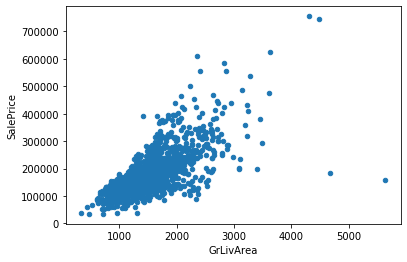

In [12]:
#plotting 'GrLivArea' w.r.t the traget variable 'SalePrice'
# 'GrLivArea' - Above grade (ground) living area square feet
grlivarea = pd.concat([data['SalePrice'], data['GrLivArea']], axis=1)
grlivarea.plot.scatter(x='GrLivArea', y='SalePrice')

Analysis - 
- From the above plot between 'GrLivArea' and 'SalePrice', we can see that there are some houses with larger area but their price is low.
- Also, there is a linear relationship between 'GrLivArea' and 'SalePrice'.
- Values of GrLivArea greater than 4000 seem to be outliers.

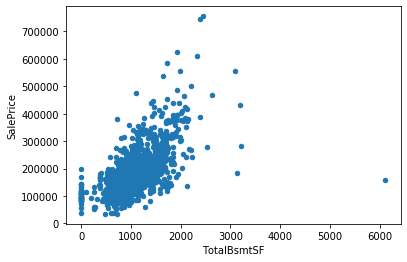

In [13]:
#plotting 'TotalBsmtSF' w.r.t the traget variable 'SalePrice'
# 'TotalBsmtSF' - Total square feet of basement area
totbsmt = pd.concat([data['SalePrice'], data['TotalBsmtSF']], axis=1)
totbsmt.plot.scatter(x='TotalBsmtSF', y='SalePrice')

Analysis - 
- Similar to the above plot, we can see here there is a house with larger 'TotalBsmtSF' area but the price is very low.
- Also, 'TotalBsmtSF' and 'SalePrice' plot shows linear relationship.
- Values of TotalBsmtSF greater than 3000 seem to be outliers.

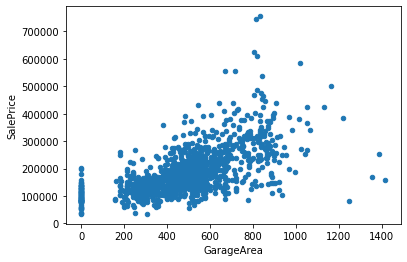

In [14]:
#plotting 'GarageArea' w.r.t the traget variable 'SalePrice'
#'GarageArea' - Size of garage in square feet
grgarea = pd.concat([data['SalePrice'], data['GarageArea']], axis=1)
grgarea.plot.scatter(x='GarageArea', y='SalePrice')

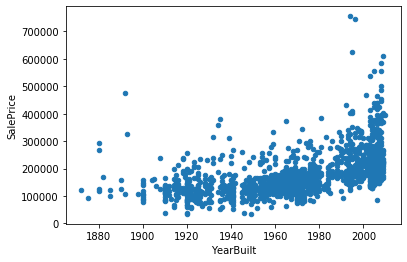

In [15]:
#plotting 'YearBuilt' w.r.t the traget variable 'SalePrice'
#'YearBuilt' - Size of garage in square feet
yrbuilt = pd.concat([data['SalePrice'], data['YearBuilt']], axis=1)
yrbuilt.plot.scatter(x='YearBuilt', y='SalePrice')

Analysis - 
- From the above plot, we can see that 'YearBuilt' and 'SalePrice' has linear relationship because as year increases the sale price also increases.

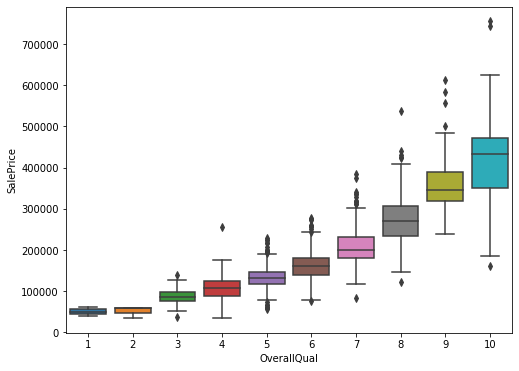

In [16]:
#plotting the box plot for 'OverallQual' (Categorical Variable) w.r.t 'SalePrice'
#'OverallQual' - Rates the overall material and finish of the house
# Box plot of overallqual/saleprice
quality = pd.concat([data['SalePrice'], data['OverallQual']], axis=1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=quality)

<Figure size 2160x2160 with 0 Axes>

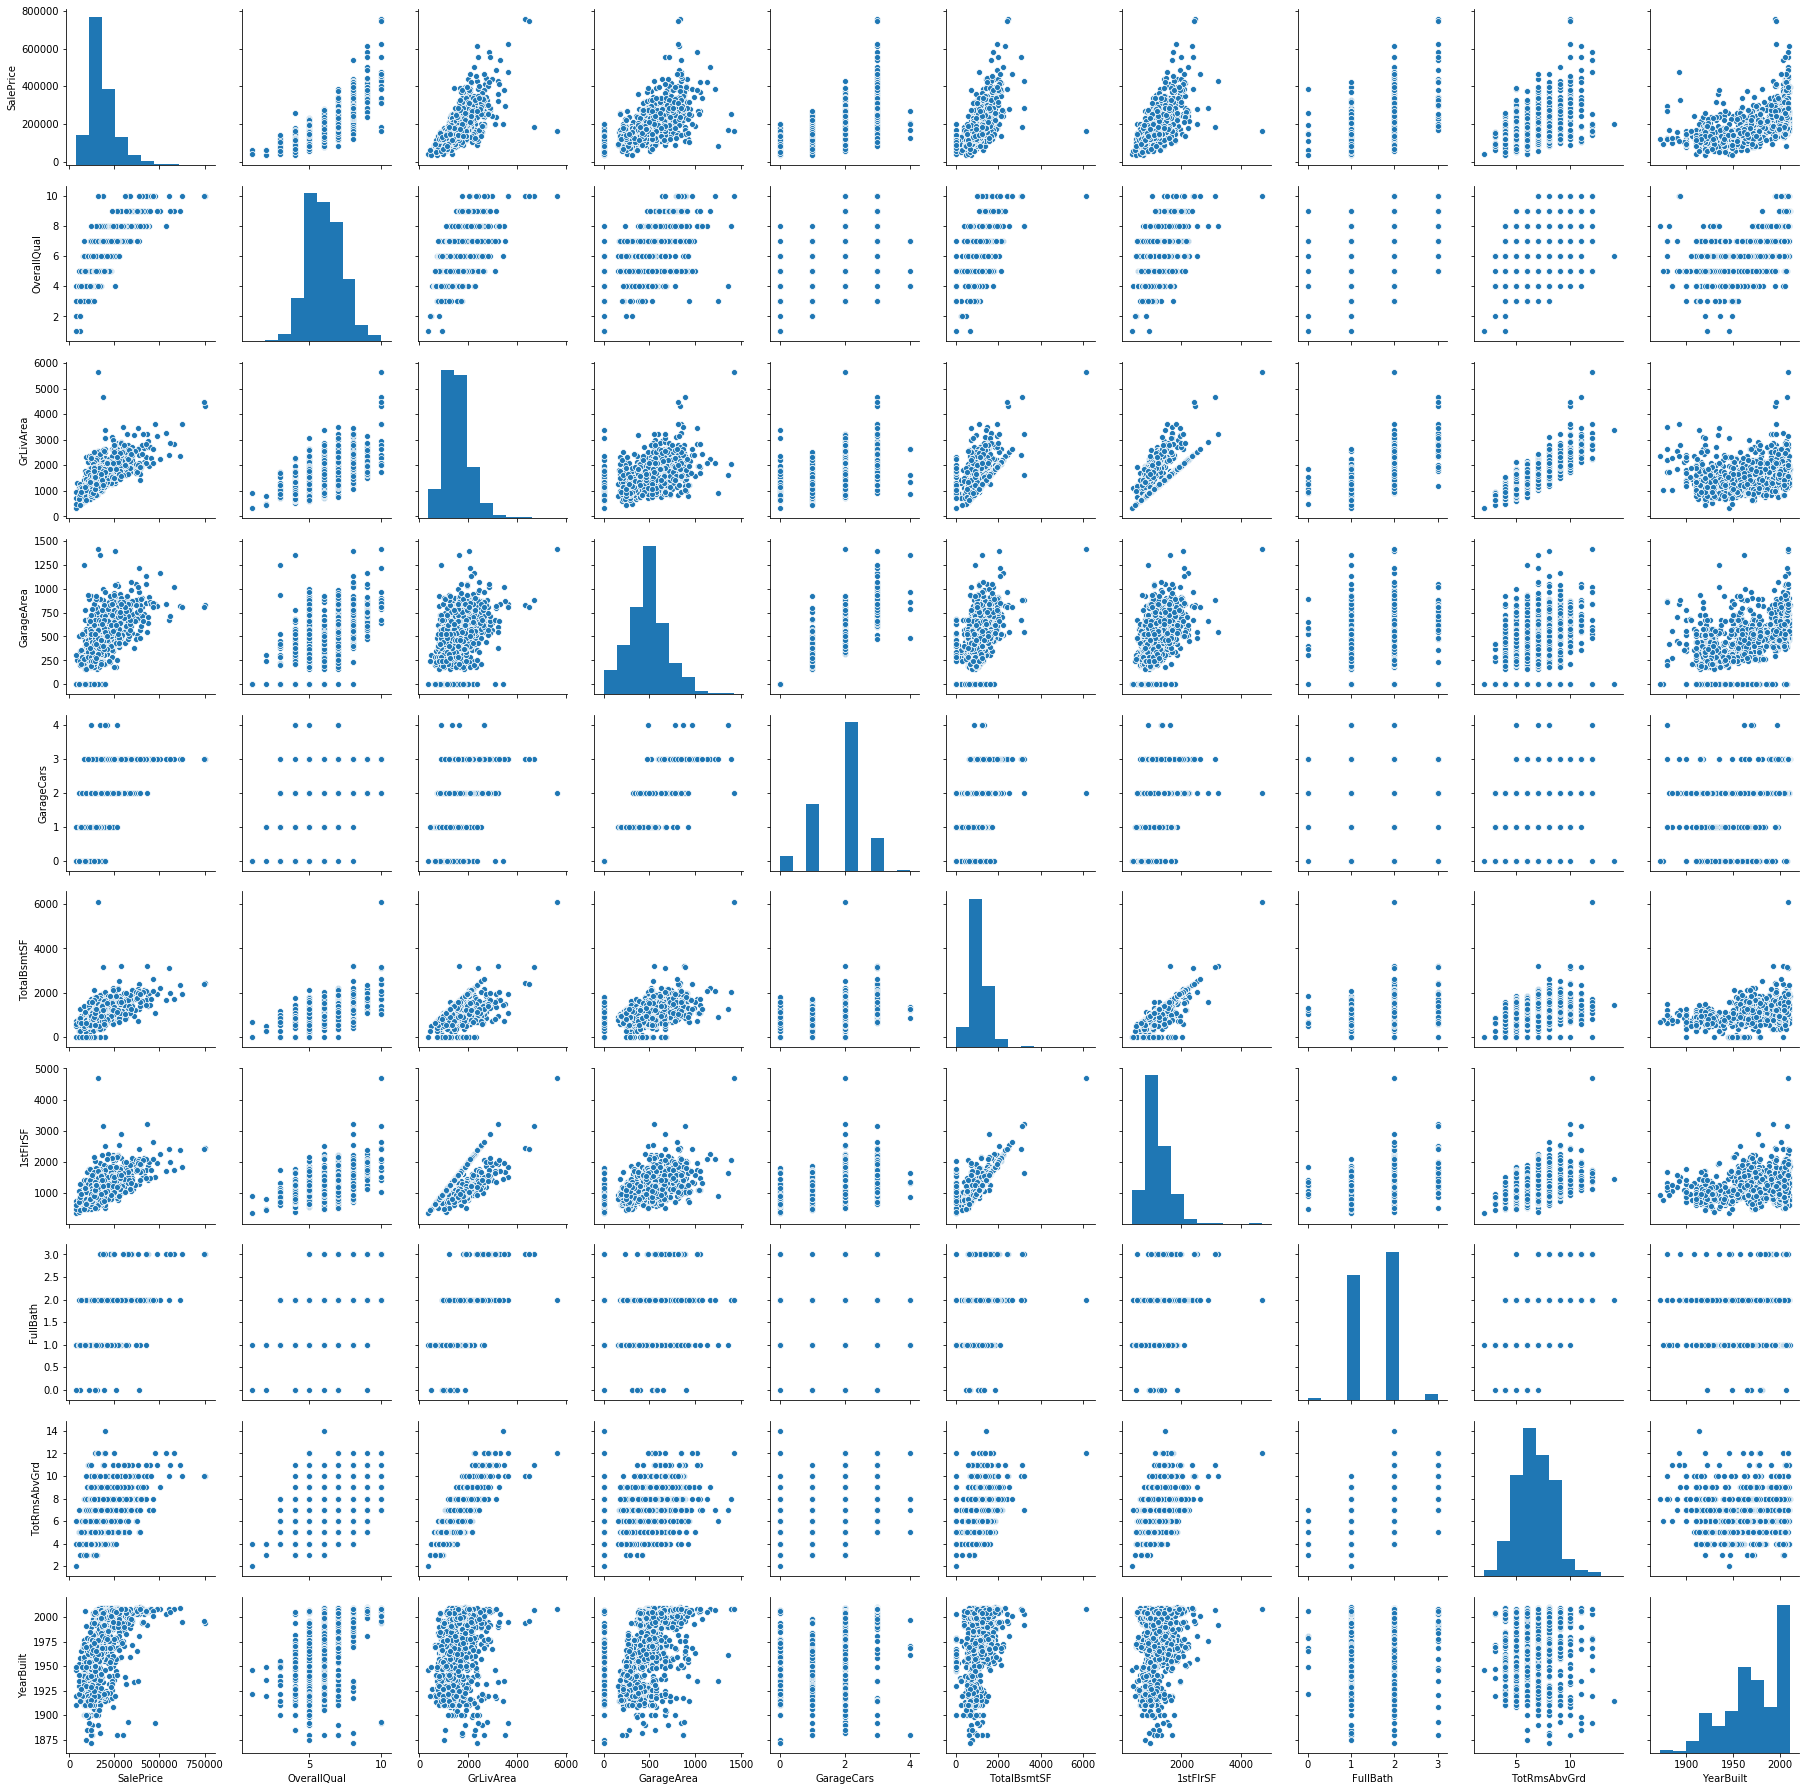

In [17]:
#plotting a scatter plot for top correlated variables 
plt.figure(figsize = (30,30))
sns.pairplot(data, vars = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea','GarageCars', 'TotalBsmtSF','1stFlrSF', 'FullBath','TotRmsAbvGrd', 'YearBuilt'])
plt.show()

Analysis - 
- From the above plots, we can see that there are some continuous numerical data like 'YearBuilt' and some are discrete numerical data like 'GarageCars'.
- Also, there are some variables which are actually categorical like 'OverallQual', etc.
- There is a strong linear relationship between 'SalePrice' and 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt'.

### 4. Data Cleaning 

#### Converting variables into categorical variables 

In [18]:
#converting MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variable
data.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = data.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [19]:
data.dtypes.value_counts()

object     48
int64      30
float64     3
dtype: int64

#### Handling Outliers  

'GrLivArea'

In [20]:
#removing the outliers from variable 'GrLivArea'
#we will drop the values having 'GrLivArea' greater than 4000
data.drop(data[data.GrLivArea>4000].index, inplace = True)
data.reset_index(drop = True, inplace = True)

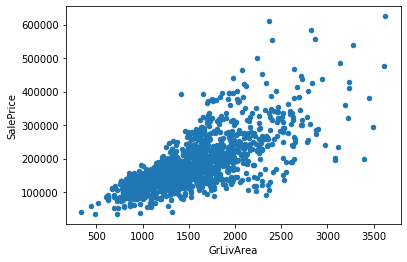

In [21]:
#plotting 'GrLivArea' w.r.t the traget variable 'SalePrice'
# 'GrLivArea' - Above grade (ground) living area square feet
grlivarea = pd.concat([data['SalePrice'], data['GrLivArea']], axis=1)
grlivarea.plot.scatter(x='GrLivArea', y='SalePrice')

Analysis -
- No more outliers

'TotalBsmtSF'

In [22]:
#removing the outliers from variable 'TotalBsmtSF'
#we will drop the values having 'TotalBsmtSF' greater than 3000
data.drop(data[data.TotalBsmtSF>4000].index, inplace = True)
data.reset_index(drop = True, inplace = True)

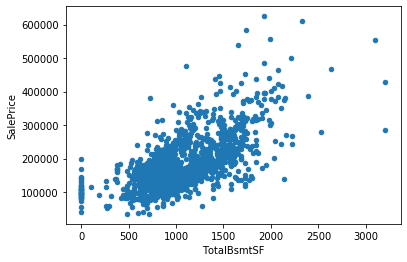

In [23]:
#plotting 'TotalBsmtSF' w.r.t the traget variable 'SalePrice'
# 'TotalBsmtSF' - Total square feet of basement area
totbsmt = pd.concat([data['SalePrice'], data['TotalBsmtSF']], axis=1)
totbsmt.plot.scatter(x='TotalBsmtSF', y='SalePrice')

Analysis -
- No more outliers

'YearBuilt'

In [24]:
#removing the outliers from variable 'YearBuilt'
#we will drop the values having 'YearBuilt' less than 1900
data.drop(data[data.YearBuilt<1900].index, inplace = True)
data.reset_index(drop = True, inplace = True)

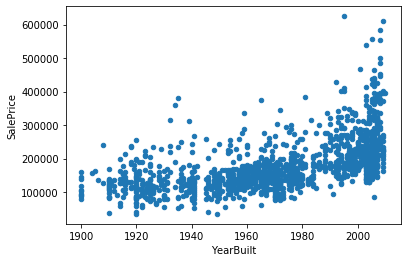

In [25]:
#plotting 'YearBuilt' w.r.t the traget variable 'SalePrice'
#'YearBuilt' - Size of garage in square feet
yrbuilt = pd.concat([data['SalePrice'], data['YearBuilt']], axis=1)
yrbuilt.plot.scatter(x='YearBuilt', y='SalePrice')

#### Handling Missing Values

Checking for null values in the dataset

In [26]:
#checking the missing values 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingdata = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missingdata.head(20)

,Total,Percent
PoolQC,1436,0.996530
MiscFeature,1388,0.963220
Alley,1356,0.941013
Fence,1165,0.808466
FireplaceQu,680,0.471895
LotFrontage,259,0.179736
GarageCond,79,0.054823
GarageType,79,0.054823
GarageYrBlt,79,0.054823
GarageFinish,79,0.054823


- There are some places where NaN actually have some meaning. So for such variables we will replace NaN with None.
- These variables are 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'

In [27]:
null_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [28]:
for i in null_cols:
    data[i].fillna('None', inplace = True)

In [29]:
total = data.isnull().sum().sort_values(ascending=False)
total.head(20)

LotFrontage     259
GarageYrBlt      79
MasVnrType        8
MasVnrArea        8
Electrical        1
SalePrice         0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
BsmtQual          0
Foundation        0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
dtype: int64

So, now we have replace NaN with None in the columns mentioned aboved by looking at the data dictionary.

In [30]:
#again checking the missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingdata = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missingdata.head(10)

,Total,Percent
LotFrontage,259,0.179736
GarageYrBlt,79,0.054823
MasVnrType,8,0.005552
MasVnrArea,8,0.005552
Electrical,1,0.000694
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


'LotFrontage' is not highly correlated to 'SalePrice' and also it has a lot of NaN/null values, hence, we will drop it.

In [31]:
data.drop('LotFrontage', axis = 1, inplace = True)

In [32]:
data.GarageYrBlt.dtypes

dtype('float64')

'GarageYrBlt' is a numerical variable, hence, we will replace it with the median.

In [33]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace = True)

In [34]:
data.MasVnrArea.dtypes

dtype('float64')

'MasVnrArea' is a numerical variable, hence, we will replace it with the median.

In [35]:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace = True)

In [36]:
data.MasVnrType.dtypes

dtype('O')

'MasVnrType' is a categorical variable, hence, we will replace it with the None.

In [37]:
data['MasVnrType'].fillna('None', inplace = True)

For the variable 'Electrical', there is only 1 missing value, hence, we will drop that row

In [38]:
data.dropna(inplace = True)

In [39]:
#checking for the missing values 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingdata = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missingdata.head(10)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1440
Data columns (total 80 columns):
Id               1440 non-null int64
MSSubClass       1440 non-null object
MSZoning         1440 non-null object
LotArea          1440 non-null int64
Street           1440 non-null object
Alley            1440 non-null object
LotShape         1440 non-null object
LandContour      1440 non-null object
Utilities        1440 non-null object
LotConfig        1440 non-null object
LandSlope        1440 non-null object
Neighborhood     1440 non-null object
Condition1       1440 non-null object
Condition2       1440 non-null object
BldgType         1440 non-null object
HouseStyle       1440 non-null object
OverallQual      1440 non-null object
OverallCond      1440 non-null object
YearBuilt        1440 non-null int64
YearRemodAdd     1440 non-null int64
RoofStyle        1440 non-null object
RoofMatl         1440 non-null object
Exterior1st      1440 non-null object
Exterior2nd      1440 n

Now, there are no missing values left in the dataset.

### 5. Feature Engineering

In [41]:
data.dtypes.value_counts()

object     48
int64      30
float64     2
dtype: int64

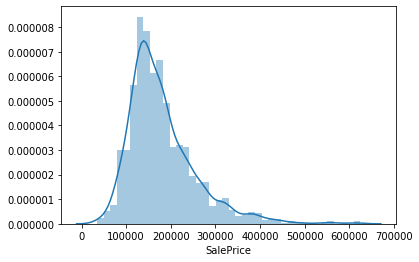

In [42]:
sns.distplot(data["SalePrice"])

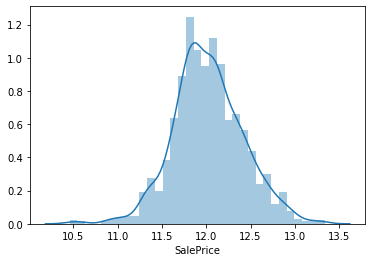

In [43]:
sns.distplot(np.log(data["SalePrice"]))

We can see in th above plot that the 'SalePrice' variable is right skewed. So we use a transformation like a logarithm so that it makes it more normally distributed.

In [44]:
data["TransformedPrice"] = np.log(data["SalePrice"])

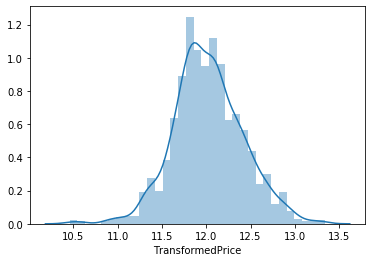

In [45]:
sns.distplot(data["TransformedPrice"])

##### Encoding Categorical Variables 

In [46]:
data.dtypes.value_counts()

object     48
int64      30
float64     3
dtype: int64

In [47]:
types_data = data.dtypes #type of each feature in data: int, float, object
num_data = types_data[(types_data == 'int64') | (types_data == 'float64')] #numerical values are either type int or float
cat_data = types_data[types_data == 'object'] #categorical values are type object

In [48]:
pd.DataFrame(types_data).reset_index().set_index(0).reset_index()[0].value_counts()

object     48
int64      30
float64     3
Name: 0, dtype: int64

In [49]:
numerical_data = list(num_data.index)

In [50]:
print(numerical_data)

['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TransformedPrice']


In [51]:
categorical_data = list(cat_data.index)

In [52]:
print(categorical_data)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [53]:
for i in categorical_data:
    feature_set = set(data[i])
    for j in feature_set:
        feature_list = list(feature_set)
        data.loc[data[i] == j, i] = feature_list.index(j)

In [54]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,13,0,8450,0,0,0,3,0,2,...,1,0,0,0,1,2,4,0,208500,12.247694
1,2,7,0,9600,0,0,0,3,0,1,...,1,0,0,0,4,1,4,0,181500,12.109011
2,3,13,0,11250,0,0,2,3,0,2,...,1,0,0,0,8,2,4,0,223500,12.317167
3,4,1,0,9550,0,0,2,3,0,3,...,1,0,0,0,1,0,4,4,140000,11.849398
4,5,13,0,14260,0,0,2,3,0,1,...,1,0,0,0,11,2,4,0,250000,12.429216


### 5. Model Building

In [55]:
X = data.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = data["TransformedPrice"].values

In [56]:
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.916016411133508
0.9014150628001569


In [58]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(3.759, 'constant'),
 (-0.341, 'LotArea'),
 (0.125, 'PoolArea'),
 (0.067, 'HeatingQC'),
 (0.063, 'HouseStyle'),
 (-0.053, 'LotConfig'),
 (0.05, 'OverallQual'),
 (0.045, 'GarageCond'),
 (0.039, 'GarageFinish'),
 (0.025, 'TotalBsmtSF'),
 (-0.025, 'YrSold'),
 (0.024, 'GrLivArea'),
 (0.022, 'GarageQual'),
 (-0.019, 'BedroomAbvGr'),
 (-0.018, 'HalfBath'),
 (-0.018, 'GarageArea'),
 (0.017, 'Condition2'),
 (-0.016, 'RoofStyle'),
 (-0.015, 'KitchenAbvGr'),
 (0.014, 'FullBath'),
 (0.013, 'KitchenQual'),
 (-0.013, 'SaleType'),
 (0.012, 'Street'),
 (-0.012, 'ExterQual'),
 (0.012, 'BsmtHalfBath'),
 (-0.011, 'Heating'),
 (0.011, 'Functional'),
 (-0.01, 'Neighborhood'),
 (-0.01, 'Condition1'),
 (-0.01, 'TotRmsAbvGrd'),
 (0.009, 'BsmtQual'),
 (0.008, 'Alley'),
 (-0.007, 'Foundation'),
 (0.006, 'Utilities'),
 (-0.006, 'Exterior2nd'),
 (0.006, 'CentralAir'),
 (0.006, 'Fireplaces'),
 (-0.006, 'PoolQC'),
 (-0.005, 'ExterCond'),
 (0.005, 'GarageYrBlt'),
 (-0.005, 'Fence'),
 (0.004, 'RoofMatl'),
 (0.003, 

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002238,0.001043,0.000614,0.000228,0.0001,{'alpha': 0.0001},-0.096234,-0.092661,-0.086778,-0.094651,...,-0.091332,0.004063,27,-0.077535,-0.080447,-0.079729,-0.079847,-0.081640,-0.079839,0.001337
1,0.001793,0.000528,0.000544,0.000179,0.001,{'alpha': 0.001},-0.096231,-0.092662,-0.086778,-0.094650,...,-0.091332,0.004063,26,-0.077535,-0.080447,-0.079729,-0.079847,-0.081640,-0.079840,0.001337
2,0.001430,0.000045,0.000381,0.000011,0.01,{'alpha': 0.01},-0.096204,-0.092666,-0.086777,-0.094650,...,-0.091328,0.004055,25,-0.077536,-0.080450,-0.079732,-0.079848,-0.081641,-0.079841,0.001337
3,0.001384,0.000039,0.000376,0.000007,0.05,{'alpha': 0.05},-0.096088,-0.092685,-0.086776,-0.094648,...,-0.091311,0.004025,24,-0.077540,-0.080461,-0.079745,-0.079852,-0.081648,-0.079849,0.001338
4,0.001371,0.000049,0.000382,0.000016,0.1,{'alpha': 0.1},-0.095953,-0.092707,-0.086774,-0.094645,...,-0.091291,0.003990,23,-0.077569,-0.080474,-0.079761,-0.079857,-0.081655,-0.079863,0.001331


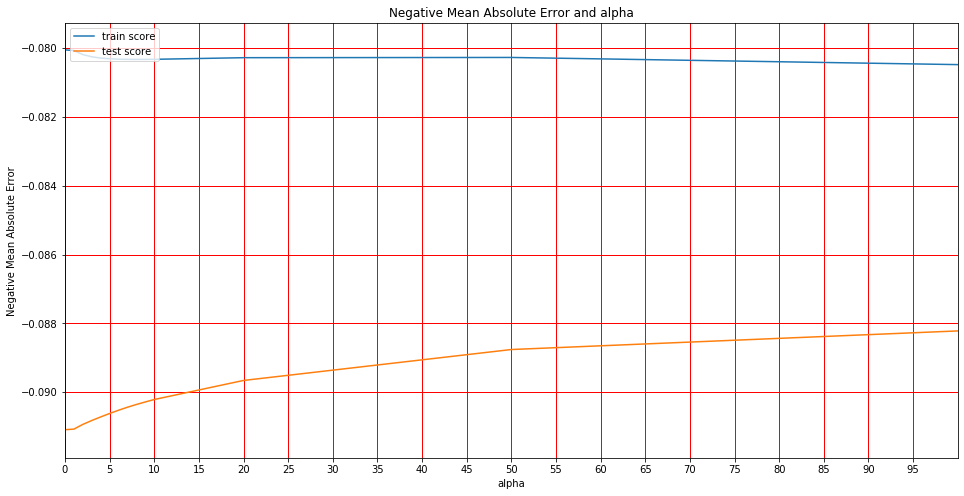

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [62]:
model_cv.best_params_

{'alpha': 100}

In [63]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9116148153456679
0.9099723859527178


In [64]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(2.798, 'constant'),
 (0.054, 'HouseStyle'),
 (0.048, 'OverallQual'),
 (0.024, 'HeatingQC'),
 (-0.022, 'YrSold'),
 (0.019, 'GarageCond'),
 (0.018, 'GarageFinish'),
 (0.016, 'Condition2'),
 (-0.015, 'LotConfig'),
 (0.013, 'TotalBsmtSF'),
 (0.012, 'GrLivArea'),
 (-0.012, 'HalfBath'),
 (-0.012, 'SaleType'),
 (-0.01, 'Neighborhood'),
 (-0.01, 'Heating'),
 (0.01, 'KitchenQual'),
 (0.01, 'GarageQual'),
 (0.009, 'BsmtQual'),
 (-0.009, 'KitchenAbvGr'),
 (0.009, 'Functional'),
 (0.009, 'Fireplaces'),
 (-0.008, 'LotArea'),
 (0.008, 'Alley'),
 (-0.008, 'RoofStyle'),
 (-0.008, 'Foundation'),
 (0.008, 'FullBath'),
 (0.007, 'Street'),
 (0.007, 'CentralAir'),
 (-0.007, 'BedroomAbvGr'),
 (-0.006, 'LotShape'),
 (-0.006, 'ExterCond'),
 (-0.006, 'TotRmsAbvGrd'),
 (-0.006, 'Fence'),
 (0.005, 'MasVnrArea'),
 (-0.005, 'PoolQC'),
 (-0.004, 'MSSubClass'),
 (-0.004, 'Condition1'),
 (0.004, 'RoofMatl'),
 (-0.004, 'Exterior2nd'),
 (-0.004, 'ExterQual'),
 (0.004, 'GarageYrBlt'),
 (0.003, 'Utilities'),
 (0.003, '

In [65]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007755,0.001314,0.000592,0.000172,0.0001,{'alpha': 0.0001},-0.095656,-0.092375,-0.086456,-0.094462,...,-0.091042,0.003967,3,-0.077457,-0.080505,-0.079781,-0.079779,-0.081647,-0.079834,0.001371
1,0.004853,0.000658,0.000572,0.000224,0.001,{'alpha': 0.001},-0.092836,-0.090713,-0.086397,-0.093861,...,-0.089479,0.003902,2,-0.078716,-0.080716,-0.080554,-0.080202,-0.081597,-0.080357,0.000940
2,0.003004,0.000159,0.000422,0.000026,0.01,{'alpha': 0.01},-0.091670,-0.088872,-0.087275,-0.091623,...,-0.087943,0.004187,1,-0.082074,-0.084258,-0.083533,-0.083358,-0.085642,-0.083773,0.001170
3,0.016836,0.003324,0.000493,0.000159,0.05,{'alpha': 0.05},-0.117994,-0.100410,-0.106791,-0.112863,...,-0.107279,0.007398,4,-0.104277,-0.103102,-0.102745,-0.103410,-0.105781,-0.103863,0.001085
4,0.010620,0.004066,0.000645,0.000287,0.1,{'alpha': 0.1},-0.119568,-0.105045,-0.111922,-0.115164,...,-0.110448,0.006860,5,-0.104843,-0.108773,-0.106671,-0.107035,-0.110453,-0.107555,0.001913


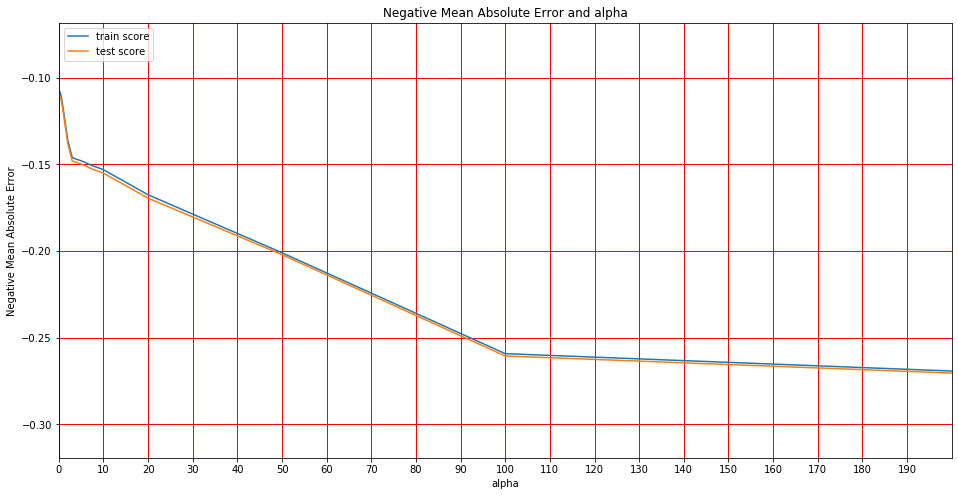

In [67]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [68]:
model_cv.best_params_

{'alpha': 0.01}

In [69]:
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9127094758627841
0.9110361983735842


In [70]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(3.448, 'constant'),
 (0.063, 'HouseStyle'),
 (0.055, 'HeatingQC'),
 (0.049, 'OverallQual'),
 (0.033, 'GarageCond'),
 (0.029, 'GarageFinish'),
 (-0.028, 'LotConfig'),
 (-0.024, 'YrSold'),
 (0.017, 'Condition2'),
 (0.015, 'GrLivArea'),
 (0.012, 'TotalBsmtSF'),
 (-0.012, 'HalfBath'),
 (-0.012, 'SaleType'),
 (-0.011, 'Neighborhood'),
 (-0.01, 'Heating'),
 (-0.01, 'KitchenAbvGr'),
 (0.009, 'KitchenQual'),
 (0.009, 'Fireplaces'),
 (0.008, 'Alley'),
 (0.007, 'GarageQual'),
 (-0.007, 'Fence'),
 (-0.006, 'RoofStyle'),
 (-0.006, 'ExterCond'),
 (-0.006, 'Foundation'),
 (0.006, 'Functional'),
 (0.005, 'FullBath'),
 (-0.005, 'PoolQC'),
 (0.004, 'CentralAir'),
 (0.004, 'GarageYrBlt'),
 (0.003, 'Street'),
 (-0.003, 'LotShape'),
 (0.003, 'OverallCond'),
 (0.003, 'RoofMatl'),
 (0.003, 'BsmtQual'),
 (-0.003, 'BsmtExposure'),
 (-0.003, 'TotRmsAbvGrd'),
 (-0.002, 'Exterior2nd'),
 (-0.001, 'Id'),
 (-0.001, 'MSSubClass'),
 (0.001, 'LandSlope'),
 (0.001, 'BldgType'),
 (0.001, 'YearBuilt'),
 (0.001, 'YearRe

In [71]:
#double the alpha of Ridge Regression
alpha = 200
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9092412111313959
0.9090614135294062


In [72]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(2.379, 'constant'),
 (0.048, 'HouseStyle'),
 (0.044, 'OverallQual'),
 (-0.02, 'YrSold'),
 (0.015, 'Condition2'),
 (0.015, 'HeatingQC'),
 (0.012, 'GarageFinish'),
 (0.012, 'GarageCond'),
 (-0.011, 'SaleType'),
 (-0.01, 'Neighborhood'),
 (-0.01, 'Heating'),
 (0.01, 'Fireplaces'),
 (-0.009, 'LotConfig'),
 (0.009, 'TotalBsmtSF'),
 (-0.009, 'HalfBath'),
 (0.008, 'Alley'),
 (-0.008, 'Foundation'),
 (0.008, 'BsmtQual'),
 (0.008, 'GrLivArea'),
 (0.008, 'KitchenQual'),
 (0.008, 'Functional'),
 (0.008, 'GarageQual'),
 (-0.007, 'ExterCond'),
 (-0.007, 'KitchenAbvGr'),
 (-0.006, 'LotShape'),
 (0.006, 'CentralAir'),
 (0.006, 'FullBath'),
 (-0.005, 'RoofStyle'),
 (-0.005, 'BedroomAbvGr'),
 (-0.005, 'TotRmsAbvGrd'),
 (-0.005, 'Fence'),
 (-0.004, 'MSSubClass'),
 (-0.004, 'LotArea'),
 (0.004, 'Street'),
 (0.004, 'MasVnrArea'),
 (0.004, 'GarageYrBlt'),
 (-0.004, 'PoolQC'),
 (0.003, 'Utilities'),
 (-0.003, 'Condition1'),
 (0.003, 'OverallCond'),
 (0.003, 'RoofMatl'),
 (-0.003, 'Exterior2nd'),
 (-0.003,

In [73]:
#double the alpha of Lasso Regression
alpha =0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9100733368300191
0.9118830780996445


In [74]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(3.176, 'constant'),
 (0.064, 'HouseStyle'),
 (0.05, 'OverallQual'),
 (0.036, 'HeatingQC'),
 (-0.022, 'YrSold'),
 (0.018, 'GarageFinish'),
 (0.018, 'GarageCond'),
 (0.016, 'Condition2'),
 (-0.011, 'Neighborhood'),
 (0.011, 'Fireplaces'),
 (-0.011, 'SaleType'),
 (-0.009, 'Heating'),
 (0.008, 'Alley'),
 (0.007, 'GrLivArea'),
 (-0.006, 'LotConfig'),
 (-0.006, 'ExterCond'),
 (-0.006, 'Foundation'),
 (-0.006, 'HalfBath'),
 (-0.006, 'KitchenAbvGr'),
 (0.006, 'GarageQual'),
 (0.005, 'KitchenQual'),
 (0.004, 'TotalBsmtSF'),
 (-0.004, 'PoolQC'),
 (-0.003, 'LotShape'),
 (0.003, 'OverallCond'),
 (-0.003, 'BsmtExposure'),
 (0.003, 'GarageYrBlt'),
 (-0.003, 'Fence'),
 (0.002, 'RoofMatl'),
 (-0.001, 'Id'),
 (-0.001, 'MSSubClass'),
 (0.001, 'LandSlope'),
 (0.001, 'YearBuilt'),
 (0.001, 'YearRemodAdd'),
 (-0.001, 'GarageType'),
 (-0.001, 'MoSold'),
 (0.0, 'MSZoning'),
 (-0.0, 'LotArea'),
 (0.0, 'Street'),
 (0.0, 'LandContour'),
 (0.0, 'Utilities'),
 (-0.0, 'Condition1'),
 (0.0, 'BldgType'),
 (-0.0, '

### 6. Final Model

In [75]:
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9127094758627841
0.9110361983735842


In [76]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = data.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(3.448, 'constant'),
 (0.063, 'HouseStyle'),
 (0.055, 'HeatingQC'),
 (0.049, 'OverallQual'),
 (0.033, 'GarageCond'),
 (0.029, 'GarageFinish'),
 (-0.028, 'LotConfig'),
 (-0.024, 'YrSold'),
 (0.017, 'Condition2'),
 (0.015, 'GrLivArea'),
 (0.012, 'TotalBsmtSF'),
 (-0.012, 'HalfBath'),
 (-0.012, 'SaleType'),
 (-0.011, 'Neighborhood'),
 (-0.01, 'Heating'),
 (-0.01, 'KitchenAbvGr'),
 (0.009, 'KitchenQual'),
 (0.009, 'Fireplaces'),
 (0.008, 'Alley'),
 (0.007, 'GarageQual'),
 (-0.007, 'Fence'),
 (-0.006, 'RoofStyle'),
 (-0.006, 'ExterCond'),
 (-0.006, 'Foundation'),
 (0.006, 'Functional'),
 (0.005, 'FullBath'),
 (-0.005, 'PoolQC'),
 (0.004, 'CentralAir'),
 (0.004, 'GarageYrBlt'),
 (0.003, 'Street'),
 (-0.003, 'LotShape'),
 (0.003, 'OverallCond'),
 (0.003, 'RoofMatl'),
 (0.003, 'BsmtQual'),
 (-0.003, 'BsmtExposure'),
 (-0.003, 'TotRmsAbvGrd'),
 (-0.002, 'Exterior2nd'),
 (-0.001, 'Id'),
 (-0.001, 'MSSubClass'),
 (0.001, 'LandSlope'),
 (0.001, 'BldgType'),
 (0.001, 'YearBuilt'),
 (0.001, 'YearRe